In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
data, metadata = tfds.load('cats_vs_dogs', as_supervised=True,with_info=True)

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]WARNING:absl:1738 images were corrupted and were skipped


Dataset cats_vs_dogs downloaded and prepared to C:\Users\Nicolas Carreno\tensorflow_datasets\cats_vs_dogs\4.0.0. Subsequent calls will reuse this data.


In [4]:
metadata

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='C:\\Users\\Nicolas Carreno\\tensorflow_datasets\\cats_vs_dogs\\4.0.0',
    download_size=786.68 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon a

,image,label
0,,1 (dog)
1,,1 (dog)
2,,1 (dog)
3,,0 (cat)
4,,1 (dog)

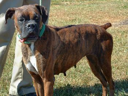
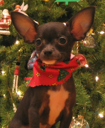
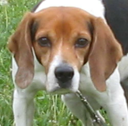
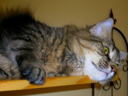
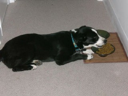

In [5]:
tfds.as_dataframe(data['train'].take(5),metadata)

Tratamiento de DATOS

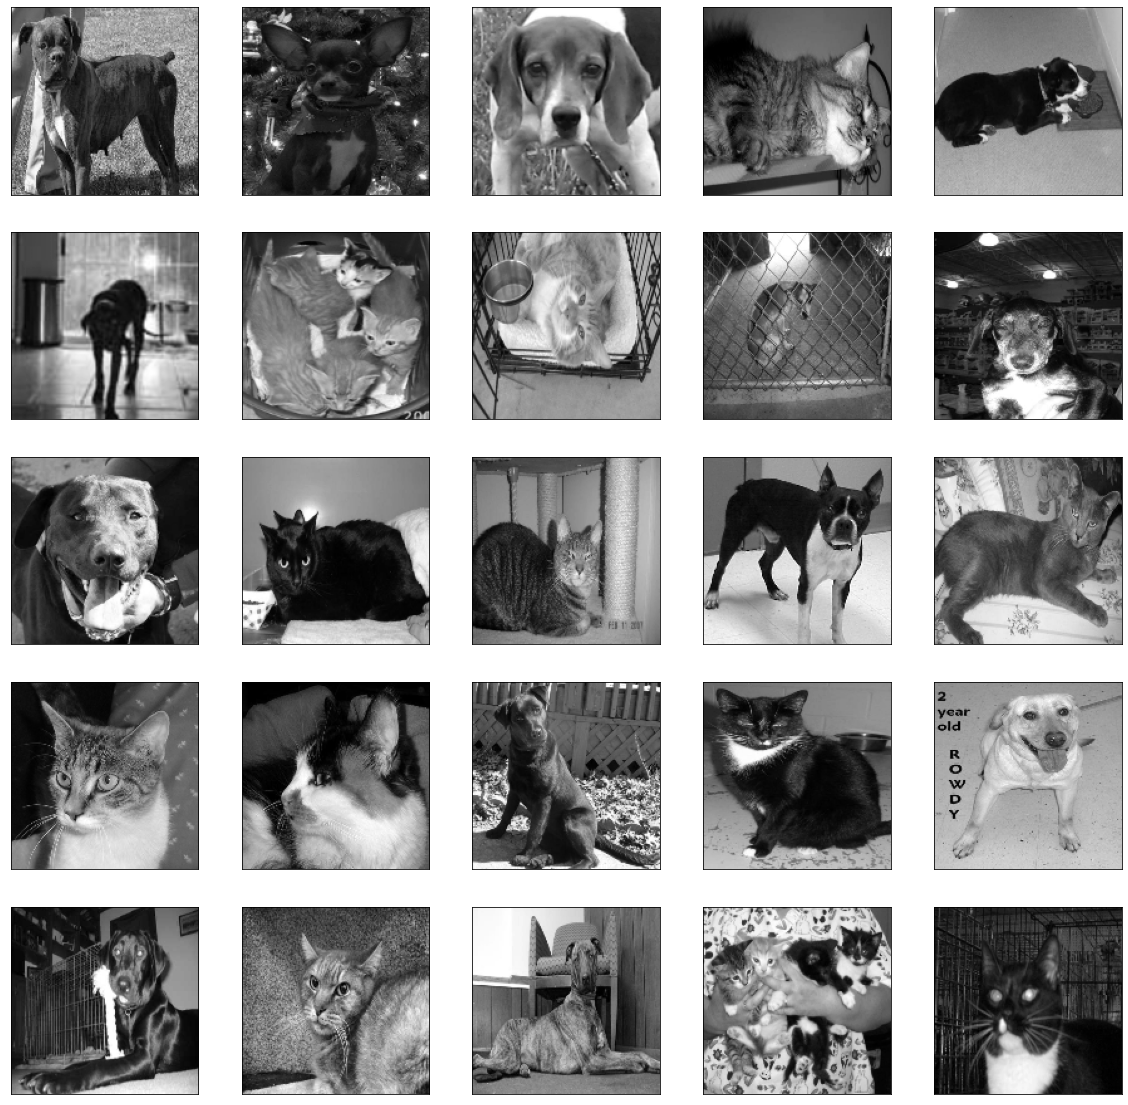

In [24]:
import matplotlib.pyplot as plt
import cv2
size = 150

plt.figure(figsize=(20,20))

for i, (imagen,etiqueta) in enumerate (data['train'].take(25)):
    imagen = cv2.resize(imagen.numpy(),(size,size))
    imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen,cmap='gray')

In [25]:
data_train = []

for i, (imagen,etiqueta) in enumerate (data['train']):
    imagen = cv2.resize(imagen.numpy(),(size,size))
    imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
    imagen = imagen.reshape(size,size,1)
    data_train.append([imagen,etiqueta])

In [26]:
len(data_train)

23262

In [27]:
import numpy as np

x=[]
y=[]

for imagen,etiqueta in data_train:
    x.append(imagen)
    y.append(etiqueta)

x = np.array(x).astype(float)/255
y = np.array(y)

Definicion de los modelos